In [1]:
import copy
import scipy
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as scipyh
from scipy.spatial.distance import squareform

In [2]:
pol_vals = np.linspace(0.005, 0.025, 11)
adh_vals = np.linspace(0.05, 0.25, 11)

#### Simulations w/o proliferation (H1 classification)

In [3]:
pairwise_wass_matrix = np.load("pairwise_wass_H1.npy")

In [4]:
v = squareform(pairwise_wass_matrix)
dendogram = scipyh.complete(v)
class_labels = scipyh.fcluster(dendogram, t=2.5, criterion='distance')

In [5]:
labels = np.sort(np.unique(class_labels))
num_labels = len(labels)
label_cnt = [0] * num_labels

permut_arr = []

lab_idx = 0
for lab in labels:
    for idx in range(len(class_labels)):
        if class_labels[idx] == lab:
            permut_arr.append(idx)
            label_cnt[lab_idx] += 1
    lab_idx += 1
    
permut_arr_2 = [x+1 for x in permut_arr]

In [6]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [7]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [8]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [9]:
cond_names_swp = [cond_names[x] for x in permut_arr]
cond_vals_swp = [cond_vals[x] for x in permut_arr]

In [10]:
# remove polarization |P| = 0.005, did not reach steady state

num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr_2 = np.delete(permut_arr_2, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

cnt = 0
for adh in adh_vals:
    for pol in pol_vals:
        if pol == 0.005:
            label_cnt[class_labels[cnt]-1] -= 1
        cnt += 1

In [11]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [12]:
label_cnt

[22, 15, 41, 7, 15, 0, 9, 1]

In [13]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr_2)

num_c1 = 0
num_c2 = 0
num_c3 = 0
num_c4 = 0
num_c5 = 0
num_c6 = 0
num_c7 = 0
num_c8 = 0

k = 0
for i in range(11):
    for j in range(10):
        
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
                
        if idx < sum(label_cnt[0:1]):
            num_c1 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:2]):
            num_c2 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:3]):
            num_c3 += 1
            classified[i,j,:] = [77/255, 175/255, 74/255]     # individual (green) [0, 1, 0]
        elif idx < sum(label_cnt[0:4]):
            num_c4 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:5]):
            num_c5 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:6]):
            num_c6 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:7]):
            num_c7 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:8]):
            num_c8 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        else:
            print(idx)
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier (yellow) [1, 1, 0]

print([num_c1, num_c2, num_c3, num_c4, num_c5, num_c6, num_c7, num_c8])

[22, 15, 41, 7, 15, 0, 9, 1]


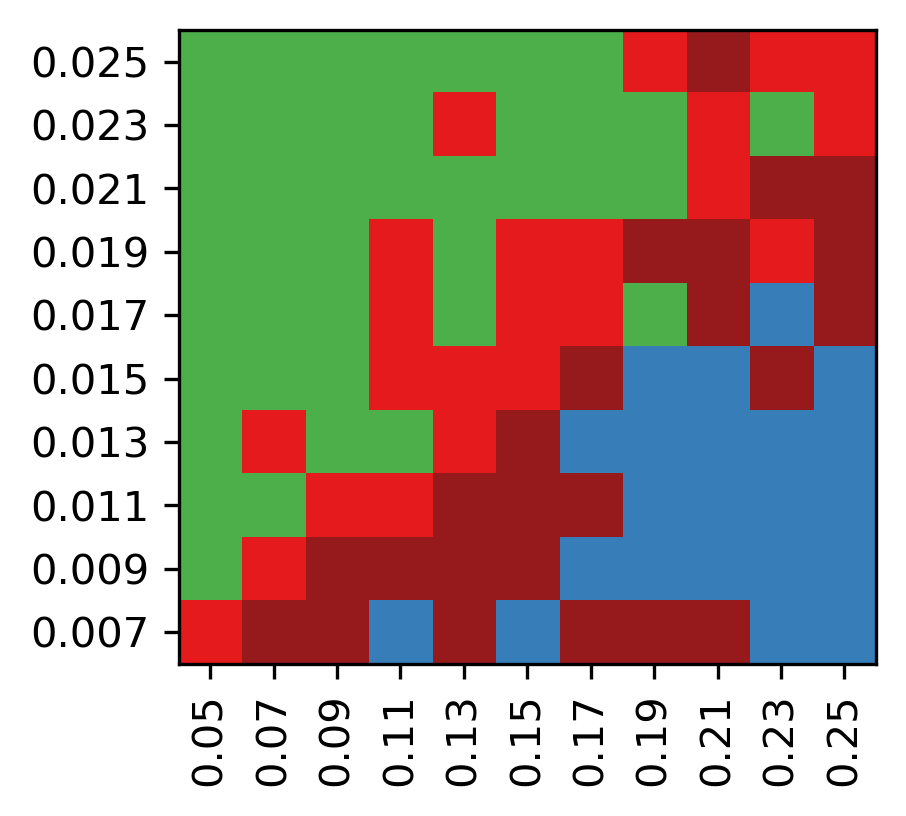

In [14]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))));

#### Simulations w/o proliferation (H0 classification)

In [15]:
pairwise_wass_matrix = np.load("pairwise_wass_H0.npy")

In [16]:
v = squareform(pairwise_wass_matrix)
dendogram = scipyh.complete(v)
class_labels = scipyh.fcluster(dendogram, t=4.5, criterion='distance')

In [17]:
labels = np.sort(np.unique(class_labels))
num_labels = len(labels)
label_cnt = [0] * num_labels

permut_arr = []

lab_idx = 0
for lab in labels:
    for idx in range(len(class_labels)):
        if class_labels[idx] == lab:
            permut_arr.append(idx)
            label_cnt[lab_idx] += 1
    lab_idx += 1
    
permut_arr_2 = [x+1 for x in permut_arr]

In [18]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [19]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [20]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [21]:
cond_names_swp = [cond_names[x] for x in permut_arr]
cond_vals_swp = [cond_vals[x] for x in permut_arr]

In [22]:
# remove polarization |P| = 0.005, did not reach steady state

num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr_2 = np.delete(permut_arr_2, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

cnt = 0
for adh in adh_vals:
    for pol in pol_vals:
        if pol == 0.005:
            label_cnt[class_labels[cnt]-1] -= 1
        cnt += 1

In [23]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [24]:
label_cnt

[3, 8, 59, 13, 5, 10, 1, 7, 4]

In [25]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr_2)

num_c1 = 0
num_c2 = 0
num_c3 = 0
num_c4 = 0
num_c5 = 0
num_c6 = 0
num_c7 = 0
num_c8 = 0
num_c9 = 0

k = 0
for i in range(11):
    for j in range(10):
        
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
                
        if idx < sum(label_cnt[0:1]):
            num_c1 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:2]):
            num_c2 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:3]):
            num_c3 += 1
            classified[i,j,:] = [77/255, 175/255, 74/255]     # individual (green) [0, 1, 0]
        elif idx < sum(label_cnt[0:4]):
            num_c4 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:5]):
            num_c5 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:6]):
            num_c6 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:7]):
            num_c7 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:8]):
            num_c8 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:9]):
            num_c9 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        else:
            print(idx)
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier (yellow) [1, 1, 0]

print([num_c1, num_c2, num_c3, num_c4, num_c5, num_c6, num_c7, num_c8, num_c9])

[3, 8, 59, 13, 5, 10, 1, 7, 4]


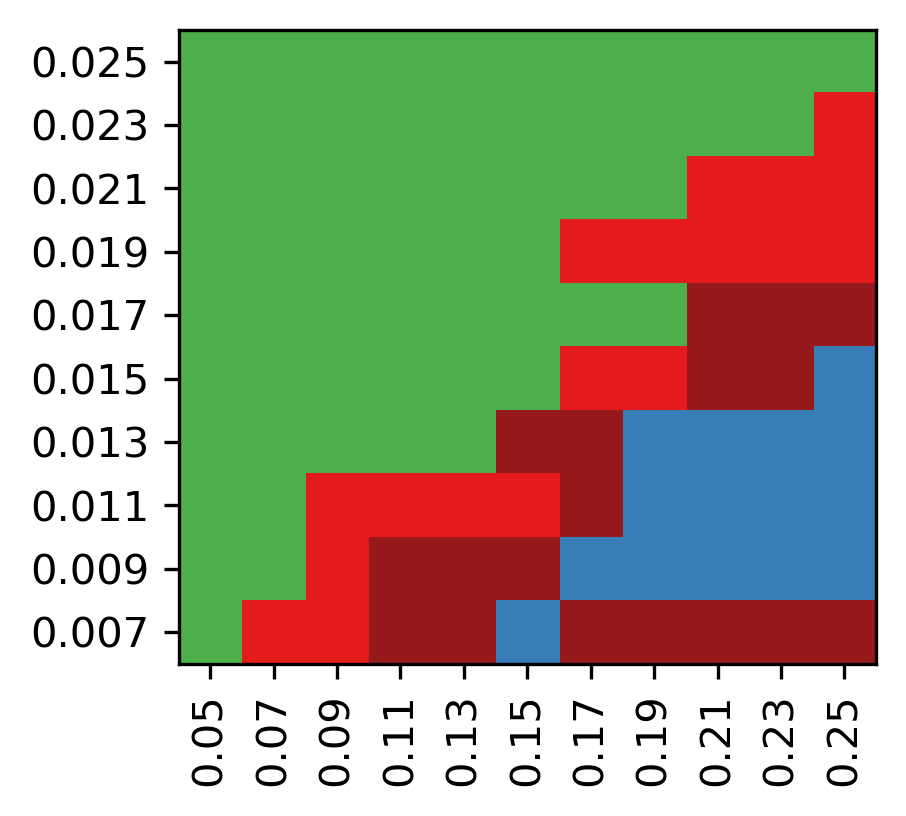

In [26]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))));

#### Simulations w/o proliferation (H0+H1 classification)

In [27]:
pairwise_wass_matrix = np.load("pairwise_wass_H0p1.npy")

In [28]:
v = squareform(pairwise_wass_matrix)
dendogram = scipyh.complete(v)
class_labels = scipyh.fcluster(dendogram, t=6.5, criterion='distance')

In [29]:
labels = np.sort(np.unique(class_labels))
num_labels = len(labels)
label_cnt = [0] * num_labels

permut_arr = []

lab_idx = 0
for lab in labels:
    for idx in range(len(class_labels)):
        if class_labels[idx] == lab:
            permut_arr.append(idx)
            label_cnt[lab_idx] += 1
    lab_idx += 1
    
permut_arr_2 = [x+1 for x in permut_arr]

In [30]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [31]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [32]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [33]:
cond_names_swp = [cond_names[x] for x in permut_arr]
cond_vals_swp = [cond_vals[x] for x in permut_arr]

In [34]:
# remove polarization |P| = 0.005, did not reach steady state

num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr_2 = np.delete(permut_arr_2, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

cnt = 0
for adh in adh_vals:
    for pol in pol_vals:
        if pol == 0.005:
            label_cnt[class_labels[cnt]-1] -= 1
        cnt += 1

In [35]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [36]:
label_cnt

[64, 14, 15, 7, 10]

In [37]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr_2)

num_c1 = 0
num_c2 = 0
num_c3 = 0
num_c4 = 0
num_c5 = 0

k = 0
for i in range(11):
    for j in range(10):
        
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
                
        if idx < sum(label_cnt[0:1]):
            num_c1 += 1
            classified[i,j,:] = [77/255, 175/255, 74/255]     # individual (green) [0, 1, 0]
        elif idx < sum(label_cnt[0:2]):
            num_c2 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:3]):
            num_c3 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:4]):
            num_c4 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:5]):
            num_c5 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        else:
            print(idx)
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier (yellow) [1, 1, 0]

print([num_c1, num_c2, num_c3, num_c4, num_c5])

[64, 14, 15, 7, 10]


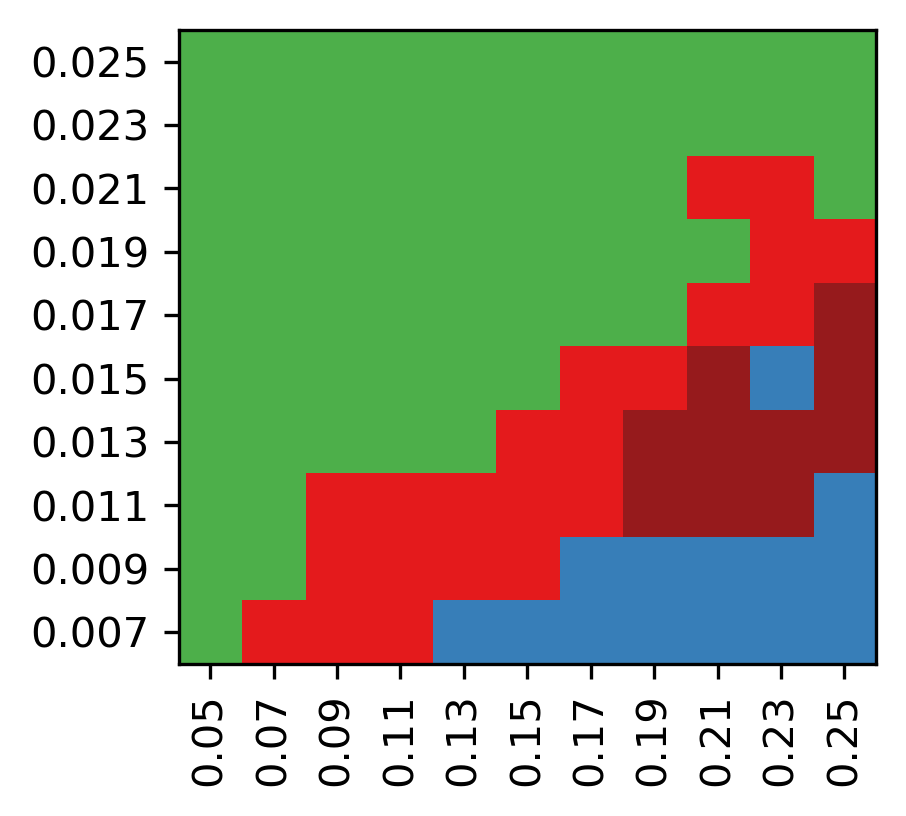

In [38]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))));

#### Simulations w/ proliferation (H1 classification)

In [39]:
pairwise_wass_matrix = np.load("pairwise_wass_prolif_H1.npy")

In [40]:
v = squareform(pairwise_wass_matrix)
dendogram = scipyh.complete(v)
class_labels = scipyh.fcluster(dendogram, t=2.5, criterion='distance')

In [41]:
labels = np.sort(np.unique(class_labels))
num_labels = len(labels)
label_cnt = [0] * num_labels

permut_arr = []

lab_idx = 0
for lab in labels:
    for idx in range(len(class_labels)):
        if class_labels[idx] == lab:
            permut_arr.append(idx)
            label_cnt[lab_idx] += 1
    lab_idx += 1
    
permut_arr_2 = [x+1 for x in permut_arr]

In [42]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [43]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [44]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [45]:
cond_names_swp = [cond_names[x] for x in permut_arr]
cond_vals_swp = [cond_vals[x] for x in permut_arr]

In [46]:
# remove polarization |P| = 0.005, did not reach steady state

num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr_2 = np.delete(permut_arr_2, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

cnt = 0
for adh in adh_vals:
    for pol in pol_vals:
        if pol == 0.005:
            label_cnt[class_labels[cnt]-1] -= 1
        cnt += 1

In [47]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [48]:
label_cnt

[24, 3, 8, 23, 9, 14, 6, 22, 1]

In [49]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr_2)

num_c1 = 0
num_c2 = 0
num_c3 = 0
num_c4 = 0
num_c5 = 0
num_c6 = 0
num_c7 = 0
num_c8 = 0
num_c9 = 0

k = 0
for i in range(11):
    for j in range(10):
        
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
                
        if idx < sum(label_cnt[0:1]):
            num_c1 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:2]):
            num_c2 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:3]):
            num_c3 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        elif idx < sum(label_cnt[0:4]):
            num_c4 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:5]):
            num_c5 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:6]):
            num_c6 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:7]):
            num_c7 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:8]):
            num_c8 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:9]):
            num_c9 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        else:
            print(idx)
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier (yellow) [1, 1, 0]

print([num_c1, num_c2, num_c3, num_c4, num_c5, num_c6, num_c7, num_c8, num_c9])

[24, 3, 8, 23, 9, 14, 6, 22, 1]


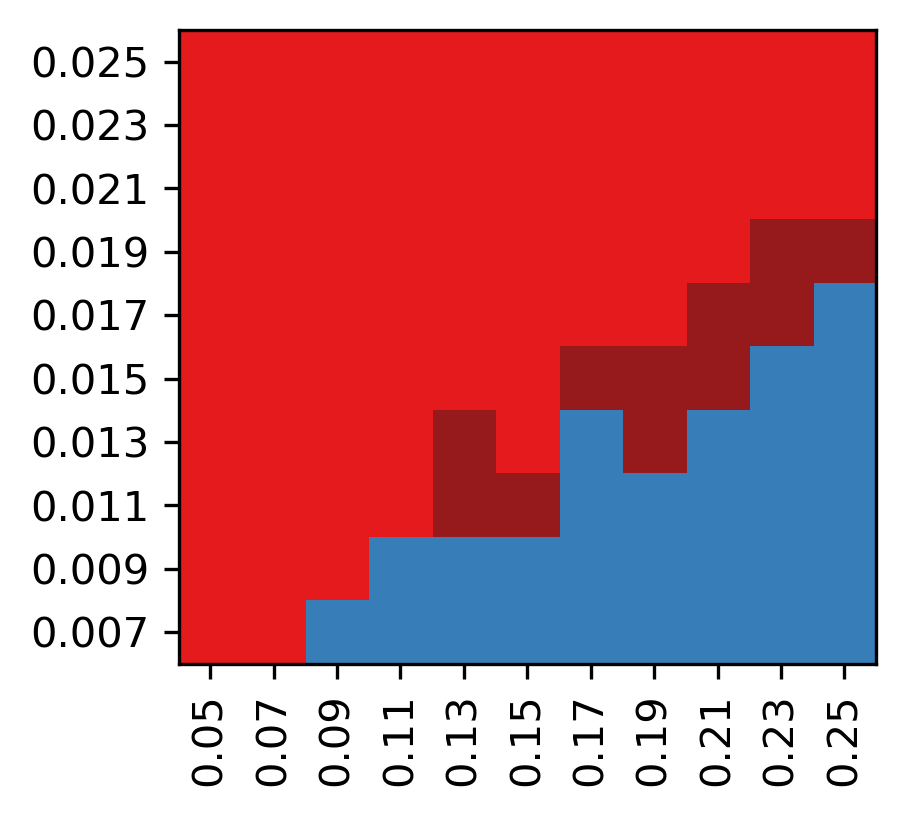

In [50]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))));

#### Simulations w/ proliferation (H0 classification)

In [51]:
pairwise_wass_matrix = np.load("pairwise_wass_prolif_H0.npy")

In [52]:
v = squareform(pairwise_wass_matrix)
dendogram = scipyh.complete(v)
class_labels = scipyh.fcluster(dendogram, t=5.0, criterion='distance')

In [53]:
labels = np.sort(np.unique(class_labels))
num_labels = len(labels)
label_cnt = [0] * num_labels

permut_arr = []

lab_idx = 0
for lab in labels:
    for idx in range(len(class_labels)):
        if class_labels[idx] == lab:
            permut_arr.append(idx)
            label_cnt[lab_idx] += 1
    lab_idx += 1
    
permut_arr_2 = [x+1 for x in permut_arr]

In [54]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [55]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [56]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [57]:
cond_names_swp = [cond_names[x] for x in permut_arr]
cond_vals_swp = [cond_vals[x] for x in permut_arr]

In [58]:
# remove polarization |P| = 0.005, did not reach steady state

num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr_2 = np.delete(permut_arr_2, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

cnt = 0
for adh in adh_vals:
    for pol in pol_vals:
        if pol == 0.005:
            label_cnt[class_labels[cnt]-1] -= 1
        cnt += 1

In [59]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [60]:
label_cnt

[8, 5, 8, 70, 6, 13]

In [61]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr_2)

num_c1 = 0
num_c2 = 0
num_c3 = 0
num_c4 = 0
num_c5 = 0
num_c6 = 0

k = 0
for i in range(11):
    for j in range(10):
        
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
                
        if idx < sum(label_cnt[0:1]):
            num_c1 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:2]):
            num_c2 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:3]):
            num_c3 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:4]):
            num_c4 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:5]):
            num_c5 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:6]):
            num_c6 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        else:
            print(idx)
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier (yellow) [1, 1, 0]

print([num_c1, num_c2, num_c3, num_c4, num_c5, num_c6])

[8, 5, 8, 70, 6, 13]


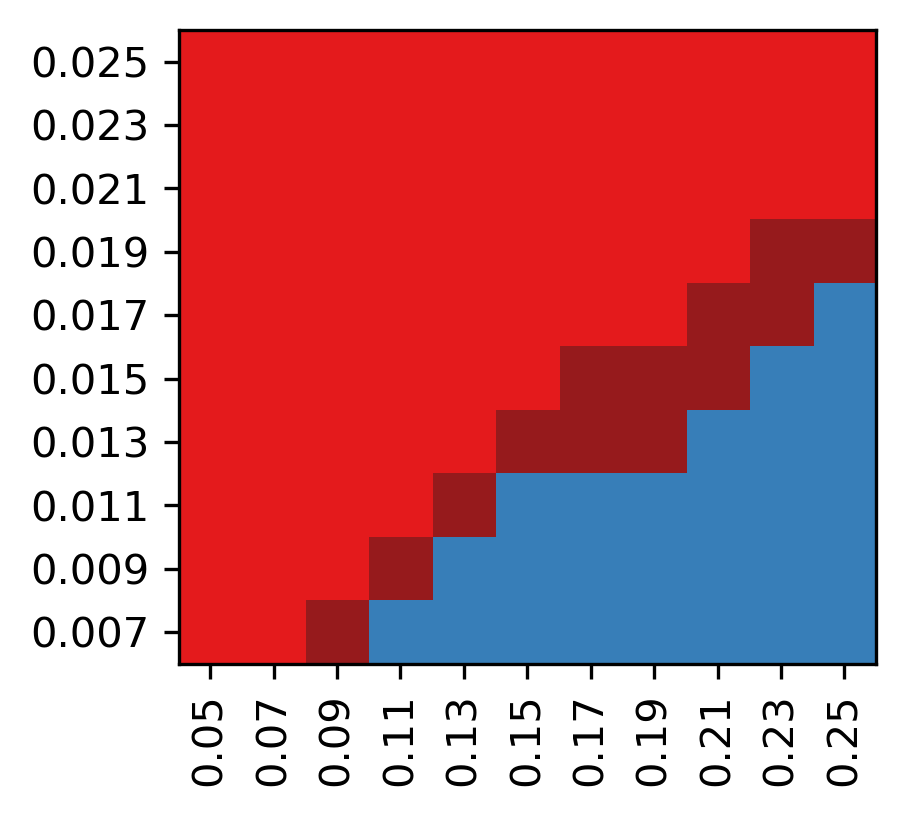

In [62]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))));

#### Simulations w/ proliferation (H0+H1 classification)

In [63]:
pairwise_wass_matrix = np.load("pairwise_wass_prolif_H0p1.npy")

In [64]:
v = squareform(pairwise_wass_matrix)
dendogram = scipyh.complete(v)
class_labels = scipyh.fcluster(dendogram, t=5.5, criterion='distance')

In [65]:
labels = np.sort(np.unique(class_labels))
num_labels = len(labels)
label_cnt = [0] * num_labels

permut_arr = []

lab_idx = 0
for lab in labels:
    for idx in range(len(class_labels)):
        if class_labels[idx] == lab:
            permut_arr.append(idx)
            label_cnt[lab_idx] += 1
    lab_idx += 1
    
permut_arr_2 = [x+1 for x in permut_arr]

In [66]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [67]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [68]:
cond_names = []
cond_vals = []
for adh in adh_vals:
    for pol in pol_vals:
        cond_names.append(r"$\alpha$ = " + repr(np.round(adh, 3)) + ", $\|P\|$ = " + repr(np.round(pol, 3)))
        cond_vals.append(repr(np.round(adh, 3))+","+repr(np.round(pol, 3)))

In [69]:
cond_names_swp = [cond_names[x] for x in permut_arr]
cond_vals_swp = [cond_vals[x] for x in permut_arr]

In [70]:
# remove polarization |P| = 0.005, did not reach steady state

num_deletions = 0
for cnt in range(len(cond_vals_swp)):
    if cond_vals_swp[cnt].split(',')[1] == '0.005':
        swapped = np.delete(swapped, cnt-num_deletions, 0)
        swapped = np.delete(swapped, cnt-num_deletions, 1)
        cond_names_swp = np.delete(cond_names_swp, cnt-num_deletions)
        permut_arr_2 = np.delete(permut_arr_2, cnt-num_deletions)
        num_deletions += 1
assert num_deletions == 11

cnt = 0
for adh in adh_vals:
    for pol in pol_vals:
        if pol == 0.005:
            label_cnt[class_labels[cnt]-1] -= 1
        cnt += 1

In [71]:
plt.figure(figsize=(40,35), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(121-num_deletions), cond_names_swp, rotation=90);
plt.yticks(range(121-num_deletions), cond_names_swp);
plt.colorbar();

In [72]:
label_cnt

[3, 8, 10, 17, 53, 6, 13]

In [73]:
classified = np.zeros([11,10,3])
permut_arr_list = list(permut_arr_2)

num_c1 = 0
num_c2 = 0
num_c3 = 0
num_c4 = 0
num_c5 = 0
num_c6 = 0
num_c7 = 0

k = 0
for i in range(11):
    for j in range(10):
        
        k = k + 1
        idx = None
        while idx == None:
            try:
                idx = permut_arr_list.index(k)
            except:
                k = k + 1
                idx = None
                
        if idx < sum(label_cnt[0:1]):
            num_c1 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:2]):
            num_c2 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:3]):
            num_c3 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:4]):
            num_c4 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:5]):
            num_c5 += 1
            classified[i,j,:] = [228/255, 26/255, 28/255]     # spanning (light red) [0.85, 0, 0]
        elif idx < sum(label_cnt[0:6]):
            num_c6 += 1
            classified[i,j,:] = [55/255, 126/255, 184/255]    # clustered (blue) [0, 0, 1]
        elif idx < sum(label_cnt[0:7]):
            num_c7 += 1
            classified[i,j,:] = [150/255, 26/255, 28/255]     # spanning w/ clusters (dark red) [0.45, 0, 0]
        else:
            print(idx)
            classified[i,j,:] = [255/255, 255/255, 51/255]    # outlier (yellow) [1, 1, 0]

print([num_c1, num_c2, num_c3, num_c4, num_c5, num_c6, num_c7])

[3, 8, 10, 17, 53, 6, 13]


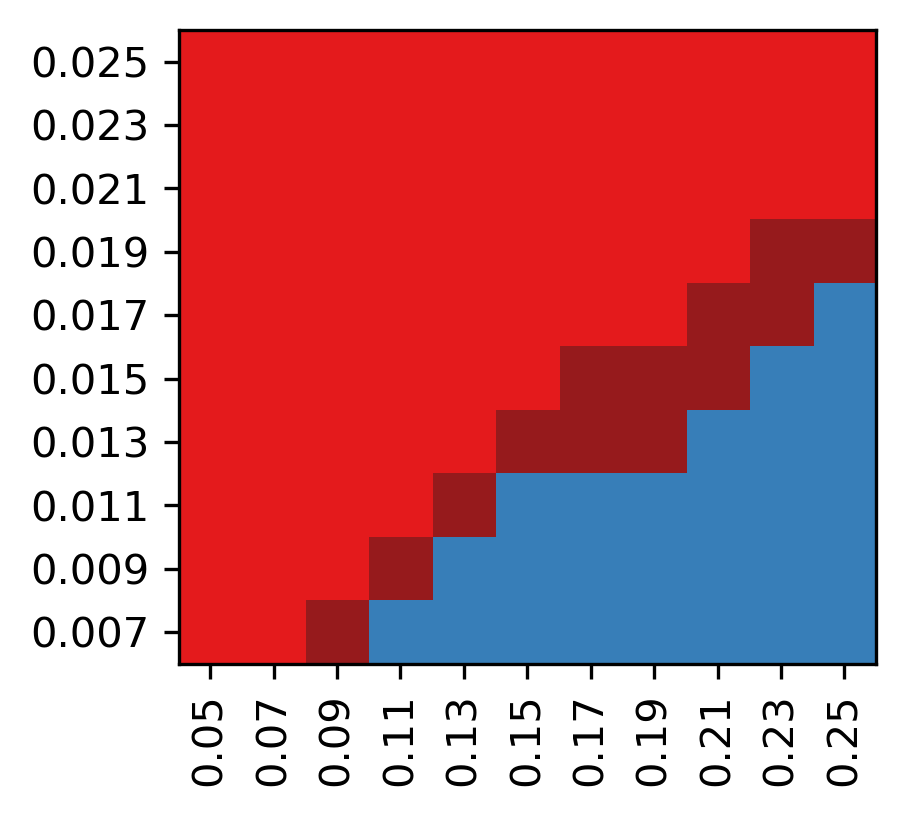

In [74]:
pol_vals_rounded = np.round(pol_vals, 3)[1:]

plt.figure(figsize=(3,3), dpi=300);
plt.xticks(range(11), np.round(adh_vals, 3), rotation=90);
plt.yticks(range(10), pol_vals_rounded[::-1]);
plt.imshow(np.flipud(np.transpose(classified, (1, 0, 2))));